* Sentiment analysis and topic modeling 
* Correlation between topic and sentiment

1. what are you looking for
2. why does it matter
3. how do you know you found what you were looking for

https://developer.twitter.com/en/dashboard

In [1]:
# Import required packages
import json, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import time

sns.set(rc={'figure.figsize':(15,12)})

In [2]:
# Load files obtained through twitterscraper 
with codecs.open('harper_tweets.json', 'r', 'utf-8') as harper_tweets:
    harper_tweets = json.load(harper_tweets, encoding='utf-8')

In [3]:
# Extract each element from the tweets and convert them to a pandas DataFrame 
list_tweets = [list(elem.values()) for elem in harper_tweets]
list_columns = list(harper_tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

In [4]:
df.to_csv('harper_tweets.csv')

Since these tweets don't have any location information, we'll need to use the `tweepy` package and have access to the Twitter developers API to extract the location from each tweet id. 

In [5]:
# Import the tweepy package
import tweepy 

# Consumer and access keys that allow access to the Twitter developer API 
consumer_key = ''
consumer_secret = ''

access_token = ''
access_token_secret = ''

# Create the tweepy API 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# %load TweetLocation.py
import tweepy 
import pandas as pd 

class tweet_location:
    """
    Obtains tweet location by passing tweet ids through the parser.
    """

    def __init__(self, id):
        self.id = id

    def get_location(id):
        try:
            tweet_status = api.get_status(id)
            tweet_location = tweet_status.user.location
            tweet_data = [id, tweet_location]
            return(tweet_data)
        except:
            print("Tweet ID not found")
    
    

In [4]:
tweets = pd.read_csv('harper_tweets.csv', encoding='latin-1')
tweets.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,0,Fred Gangnus,"<p class=""TweetTextSize js-tweet-text tweet-te...",1068655698001780736,0.0,0.0,0.0,Trade Yan. Dump salary. Sign @Bharper3407. Let...,2018-11-30T23:59:07,/fgangnus/status/1068655698001780736,fgangnus
1,1,Charles Hamel #Dodgers #Lakers #Rams #Kings #USC,"<p class=""TweetTextSize js-tweet-text tweet-te...",1068655139626483713,0.0,0.0,0.0,"Tbh..I dont want him, think its a waste of money",2018-11-30T23:56:54,/TheCharles71276/status/1068655139626483713,TheCharles71276
2,2,Lo Mejor del Deporte RADIO COLUMBIA,"<p class=""TweetTextSize js-tweet-text tweet-te...",1068654694736764929,0.0,0.0,0.0,Bryce Harper with the cubs???,2018-11-30T23:55:08,/manfredpb/status/1068654694736764929,manfredpb
3,3,Amara,"<p class=""TweetTextSize js-tweet-text tweet-te...",1068654658296717318,1.0,2.0,0.0,I better see Bryce Harper by next Wednesday,2018-11-30T23:54:59,/CL5_Amara/status/1068654658296717318,CL5_Amara
4,4,KP,"<p class=""TweetTextSize js-tweet-text tweet-te...",1068653046471815168,0.0,0.0,0.0,White Sox Bryce Harper.,2018-11-30T23:48:35,/kskeeZ/status/1068653046471815168,kskeeZ


In [18]:
# Import tweet location file 
tweet_loc = pd.read_csv('harper_tweet_locations.txt', sep=',', encoding='latin-1')
tweet_loc['tweet_id'] = tweet_loc['id'].astype(str)
tweet_loc.head()

,id,location,city,state,country,tweet_id
0,1060392263761555463,afghanistan,0,0,afghanistan,1060392263761555463
1,1097908550939148289,afghanistan,0,0,afghanistan,1097908550939148289
2,1101217408654675968,afghanistanhaitiviage,0,0,afghanistan,1101217408654675968
3,1059613363221729281,albania,0,0,albania,1059613363221729281
4,1060397419567955968,albania,0,0,albania,1060397419567955968


In [19]:
# Merge location file with tweets 
df['id'] = df['id'].astype(str)

df_merged = df.merge(tweet_loc, left_on='id', right_on='tweet_id', how='left')
df_merged.tail()

,fullname,html,id_x,likes,replies,retweets,text,timestamp,url,user,id_y,location,city,state,country,tweet_id
327143,PoloPapi,"<p class=""TweetTextSize js-tweet-text tweet-te...",1100063982906421250,3,2,0,I don’t see Bryce Harper on there..,2019-02-25T16:04:26,/PoloPapi5/status/1100063982906421250,PoloPapi5,1.100064e+18,chicagoil,chicago,il,usa,1100063982906421250
327144,Zack Tidmore,"<p class=""TweetTextSize js-tweet-text tweet-te...",1100063960295002113,0,1,0,Bryce Harper isn’t worth thirty million a year,2019-02-25T16:04:20,/_Tidmore/status/1100063960295002113,_Tidmore,1.100064e+18,pa,,,,1100063960295002113
327145,Matthew Jacobs,"<p class=""TweetTextSize js-tweet-text tweet-te...",1100063933321367552,1,2,0,Rumors are @Phillies and @Bharper3407 agreed t...,2019-02-25T16:04:14,/Jacobsm6/status/1100063933321367552,Jacobsm6,1.100064e+18,mercersburgpa,,,,1100063933321367552
327146,brett niemand,"<p class=""TweetTextSize js-tweet-text tweet-te...",1100063902820270081,0,0,0,"If you’re Bryce Harper, would it almost be bet...",2019-02-25T16:04:07,/brettniems/status/1100063902820270081,brettniems,1.100064e+18,,,,,1100063902820270081
327147,Queen to His King,"<p class=""TweetTextSize js-tweet-text tweet-te...",1100063892011659266,1,0,0,Day 119 ~ Ugh ~ Dodgers are huge threat to Phi...,2019-02-25T16:04:04,/CutlerCM/status/1100063892011659266,CutlerCM,1.100064e+18,,,,,1100063892011659266


In [9]:
df_clean = df_merged.dropna()
print('df_merged shape: {}'.format(df_merged.shape))
print('df_clean shape: {}'.format(df_clean.shape))

df_merged shape: (327148, 12)
df_clean shape: (325077, 12)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


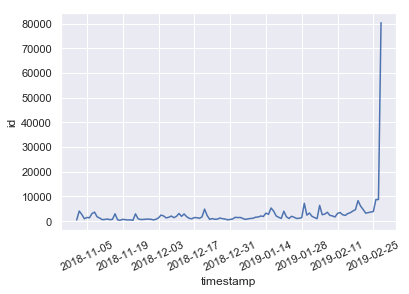

In [25]:
tweet_count = df_clean[['timestamp', 'id']]
tweet_count['timestamp'] = pd.to_datetime(tweet_count['timestamp']).dt.date
tweet_count = tweet_count.groupby('timestamp')['id'].count().reset_index()
#tweet_count.head()

sns.lineplot(x='timestamp', y='id', data=tweet_count)
_ = plt.xticks(rotation=25)
plt.show()

In [22]:
df_clean[df_clean['timestamp']>='2019-02-28'].groupby('location')['id'].count().sort_values()

location
 N. California USA                  1
 Pocahontas AR                      1
 Plymouth MN                        1
 Pluto                              1
 Pluto                              1
 Plumstead Pa                       1
 Pleasantville NJ                   1
 Pleasanton Ca                      1
 Playground of the first ...        1
 Plantagenet ON                     1
 Plano Tx                           1
 Plano Texas                        1
 Plano IL                           1
 Planeta Deporte                    1
 Planet Vegeta.                     1
 Poconos PA --- Denver CO           1
 Planet Peace                       1
 Planet Love Tron                   1
 Planet Los Angeles                 1
 Planet Jendell                     1
 Planet Frob                        1
 Planet Earth east of Mars          1
 Planet Earth (mostly)              1
 Planet Earth (For Now)             1
 Planet Arus                        1
 Planet                             1
 Pl